## 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split as split

## 2. Importing Data set

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.shape

(1014, 7)

## 3. Variable Description and Identification

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#### Here, we have Risk Level as target variable, and the rest of the variables are predictor variables.

### 3.1 Variable Data Types

#### Categorical Variable: Risk Level.

#### Numerical Variable: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.



### 3.2 Checking Null/Missing Values

In [5]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### No null values present in the data set

### 3.3 Checking Duplicates

In [6]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


#### There are 562 duplicate values in the data set which is very huge for this data, since data set has only 1014 data in it.

## 4. Analysis of individual features

### 4.1 Categorical Variables

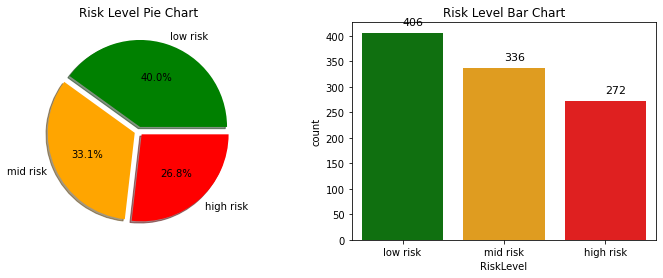

In [7]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), 
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

#### Most pregnant weomen in this dataset mostly has low health risk. 

#### Out of 1014 observations, 406 (40%) of pregnant women has low risk, 336 (33.1%) has med risk, and 272 (26.8%) has high risk.

### 4.2 Numerical Variables

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


#### From above observation it looks like there are outliers specially in Age,BS and HeartRate

### 4.2.1 Outlier deection using boxplot

In [9]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

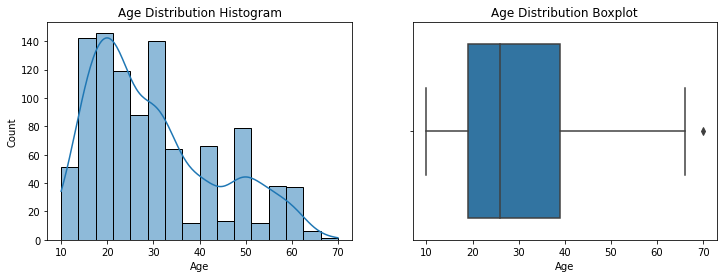

In [10]:
# Age
num_plot(data, "Age")

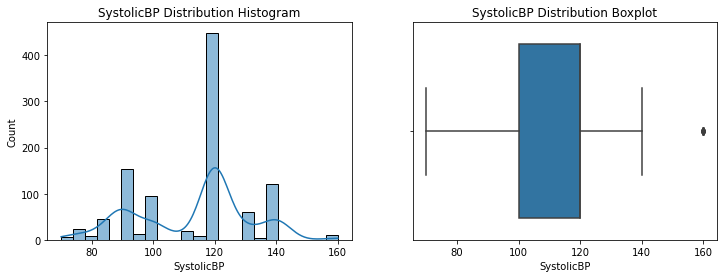

In [11]:
# SystolicBP

num_plot(data, "SystolicBP")

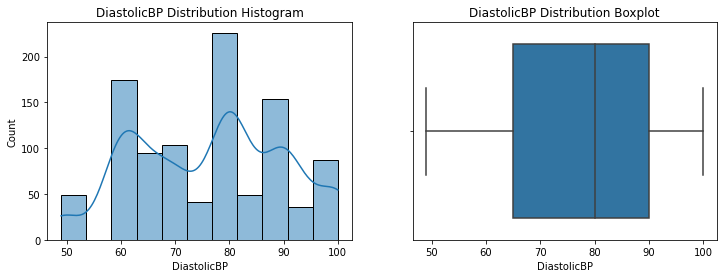

In [12]:
# DiastolicBP

num_plot(data, "DiastolicBP")

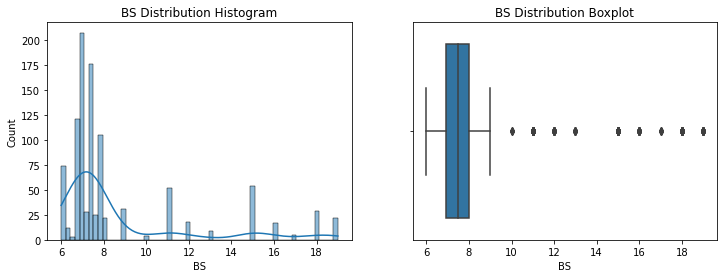

In [13]:
# BS

num_plot(data, "BS")

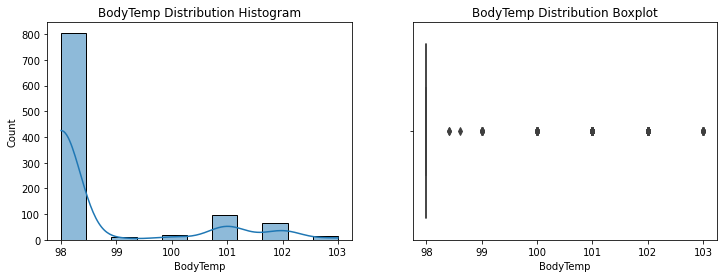

In [14]:
# BodyTemp

num_plot(data, "BodyTemp")

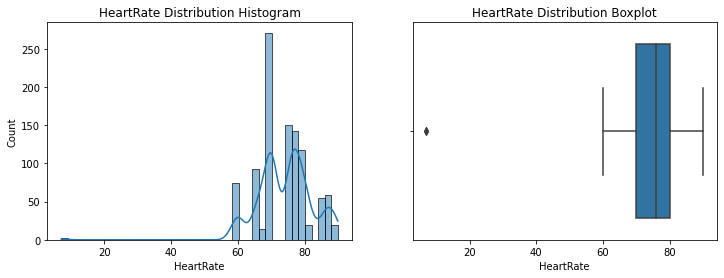

In [15]:
# HeartRate

num_plot(data, "HeartRate")

#### From the above observation, most of the features have outliers in it.

#### Most of them seem to be natural/practically possible other than HeartRate 

In [16]:
data= data.drop(data.index[data.HeartRate == 7])

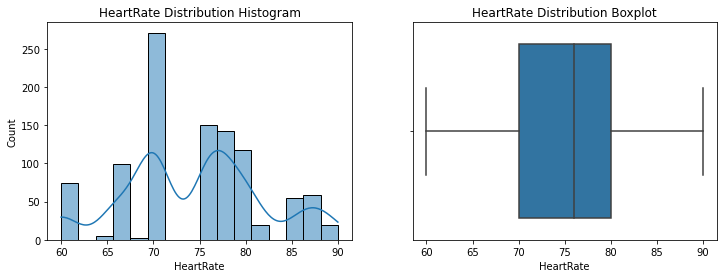

In [17]:
# HeartRate

num_plot(data, "HeartRate")

## 5. Bivariate Analysis

### 5.1 Numerical Variables

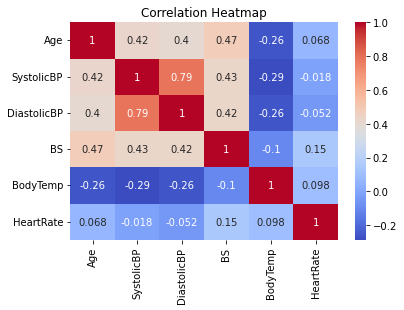

In [18]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

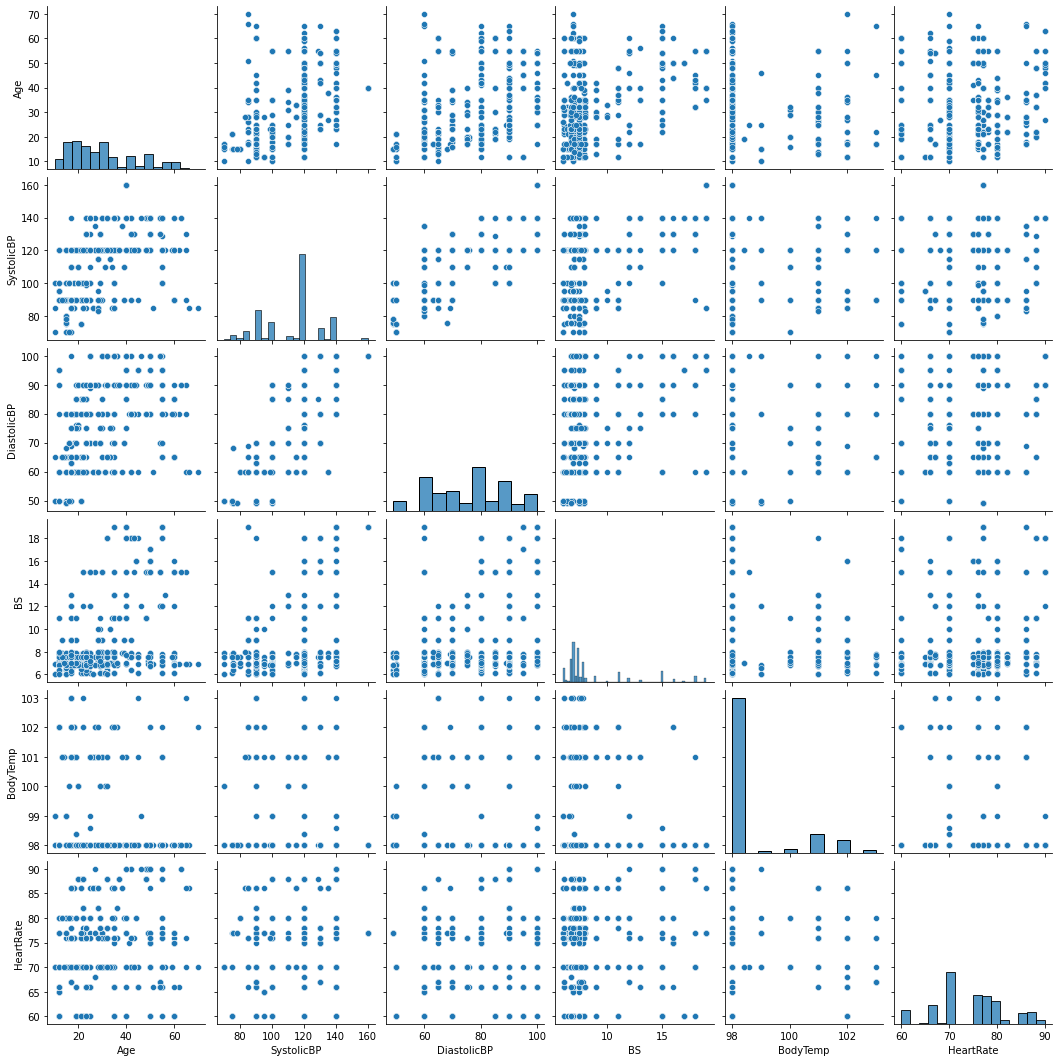

In [19]:
sns.pairplot(data)
plt.show()

#### DiastolicBP and SystolicBP are highly correlated

### 5.2 Predictor and Target

### 5.2.1 Age → RiskLevel

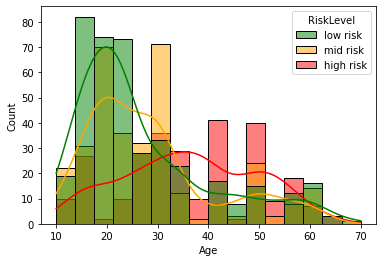

In [20]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women aged below 24 years mostly has low health risk.
#### 2.Health risks will start to increase after that age (starting from the age of 25 years).
#### 3.Surprisingly, the health risk of pregnant women over 59 years old is decreased

### 5.2.2 SystolicBP → RiskLevel

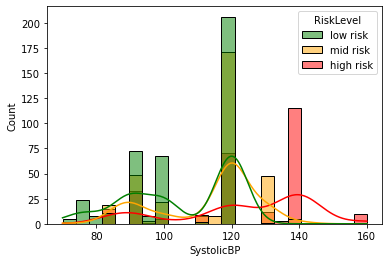

In [21]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.
#### 2.The higher pregnant women's blood pressure, the higher the health risk

### 5.2.3 DiastolicBP → RiskLevel

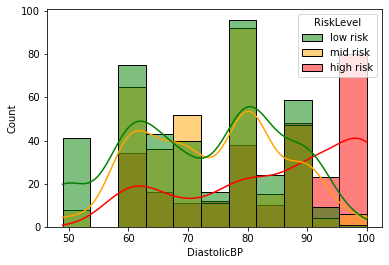

In [22]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

### 5.2.4 BS → RiskLevel

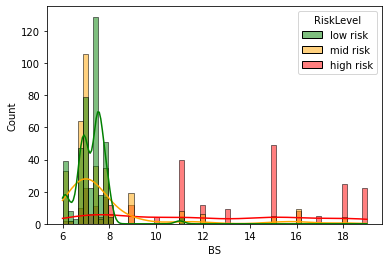

In [23]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Almost every pregnant women with blood glucose level >= 8 has high health risk.
#### 2.But otherwise, they seems to have lower health risk with blood glucose < 8

### 5.2.5 BodyTemp → RiskLevel

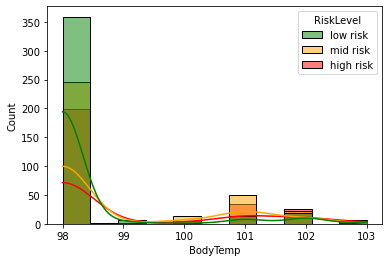

In [24]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
#### 2.Pregnant women with body temperature >= 100 mostly has higher health risk

### 5.2.6 HeartRate → RiskLevel

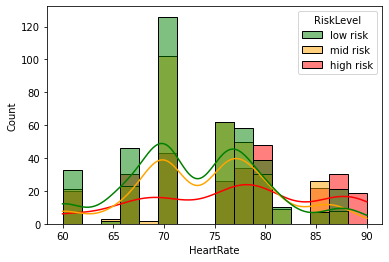

In [25]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.
#### 2.Health risks seem to be getting higher along with the number of heart rate.

## 6.Model Building

### 6.1 Spliting the data

In [26]:
X = data.drop("RiskLevel", axis=1)
y = data.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)

### 6.2 Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.09965401,  0.38322385,  0.26436991, -0.24789691, -0.48963968,
        -0.60423057],
       [-0.51176695, -1.26381755, -1.19105885, -0.36916773, -0.48963968,
         0.19406425],
       [ 1.32538012,  0.38322385,  0.26436991,  0.691952  , -0.48963968,
         1.7906539 ],
       ...,
       [-0.95268225, -2.36184515, -1.91877323, -0.24789691, -0.48963968,
        -0.60423057],
       [-0.14433754,  0.38322385,  0.26436991,  0.08559787,  2.40702214,
         0.19406425],
       [ 1.8397813 , -0.71480375, -0.82720166, -0.79361563, -0.48963968,
        -1.13642711]])

In [29]:
x_test=scaler.fit_transform(x_test)
x_test

array([[ 0.95916696,  0.32141742,  0.21785354, -0.38626633, -0.47048331,
        -0.53382409],
       [-0.04969777,  0.84339932, -0.47315065, -0.38626633, -0.47048331,
         0.53120088],
       [-0.51532765,  0.32141742,  0.21785354, -0.32530694, -0.47048331,
        -0.53382409],
       ...,
       [ 0.803957  ,  1.36538121,  1.5998619 ,  1.29011694,  1.77853031,
        -1.06633658],
       [-0.36011769,  1.36538121,  1.5998619 , -0.59962421, -0.47048331,
         0.79745712],
       [-0.36011769,  0.32141742,  0.90885772,  0.98531998,  1.77853031,
         0.79745712]])

### 6.3 Building Classification Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### 6.4 Hyperparameter Tuning 

In [31]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy'],
            'max_depth' : [4,5,6,7,8,20,50]
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    },
        'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param':{ 
            'n_estimators': [10,20,50,100,200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8,20,30,50],
            'criterion' :['gini', 'entropy']
        }
   
    },
        'LogisticRegression':{
        'model': LogisticRegression(),
        'param':{
            'C':np.logspace(-3,3,7), 
            'penalty':["l1","l2"]
        }
    },
        'BaggingClassifier':{
        'model': BaggingClassifier(),
        'param':{
            
            'n_estimators': [10,30,50,100,150,200],
            'random_state': [1,3,5,7,9,15,50,100]
        }
    },
        'AdaBoostClassifier':{
        'model': AdaBoostClassifier(),
        'param':{
            'n_estimators': [10,30,50,100,150,200],
            'random_state': [1,3,5,7,9,15,50,100]
        }
    }
}

In [32]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [33]:
pd.set_option('display.max_colwidth', -1)
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.810896,"{'criterion': 'gini', 'max_depth': 50}"
1,KNeighborsClassifier,0.663837,{'n_neighbors': 10}
2,SVC,0.713258,"{'C': 100, 'kernel': 'rbf'}"
3,RandomForestClassifier,0.829438,"{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 20}"
4,LogisticRegression,0.634100,"{'C': 0.01, 'penalty': 'l2'}"
5,BaggingClassifier,0.819538,"{'n_estimators': 150, 'random_state': 50}"
6,AdaBoostClassifier,0.639031,"{'n_estimators': 200, 'random_state': 1}"


In [34]:
## Naive bayes

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [35]:
y_pred=gnb.predict(x_train)
y_pred

array(['low risk', 'low risk', 'high risk', 'mid risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'mid risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'mid risk', 'low risk', 'high risk', 'low risk',
       'high risk', 'high risk', 'mid risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'low risk', 'high risk',
       'low risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'low risk', 'low risk', 'mid risk', 'mid risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'mid risk', 'high risk',
       'mid risk', 'low risk', 'high risk', 'mid risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'high risk', 'low risk', 'mid risk', '

In [36]:
from sklearn import metrics

print("Gaussian Naive Bayes model accuracy(in %)",metrics.accuracy_score(y_train,y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) 59.703337453646476


### 6.5 Choosing the best model

In [37]:
model_randomforest = RandomForestClassifier( criterion='entropy',max_depth=50,max_features='log2',n_estimators=100)

In [38]:
model_randomforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2')

In [39]:
y_predicted = model_randomforest.predict(x_test)

In [40]:
result= model_randomforest.score(x_test,y_test)*100
result

84.72906403940887

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
print(cm)

[[59  2  3]
 [ 0 67 12]
 [ 2 12 46]]


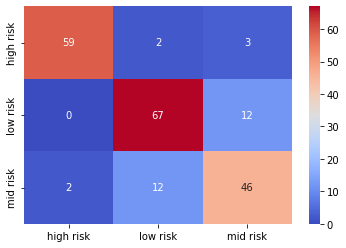

In [42]:
labels = np.unique(y_predicted)
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

In [43]:
from sklearn.metrics import classification_report
 
target_names = ['high risk', 'low risk', 'mid risk']
print(classification_report(y_test, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

   high risk       0.97      0.92      0.94        64
    low risk       0.83      0.85      0.84        79
    mid risk       0.75      0.77      0.76        60

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



In [48]:
p=scaler.transform([[float(35),float(120),float(60),float(6.1),float(98),float(76)]])

In [49]:
y1=model_randomforest.predict(p)
y1

array(['low risk'], dtype=object)

In [46]:
#import pickle
#pickle.dump(model_randomforest,open("model_randomforest.pkl",'wb'))

In [47]:
#import pickle
#pickle.dump(scaler,open("churnscaler.pkl",'wb'))